### Problem Statement

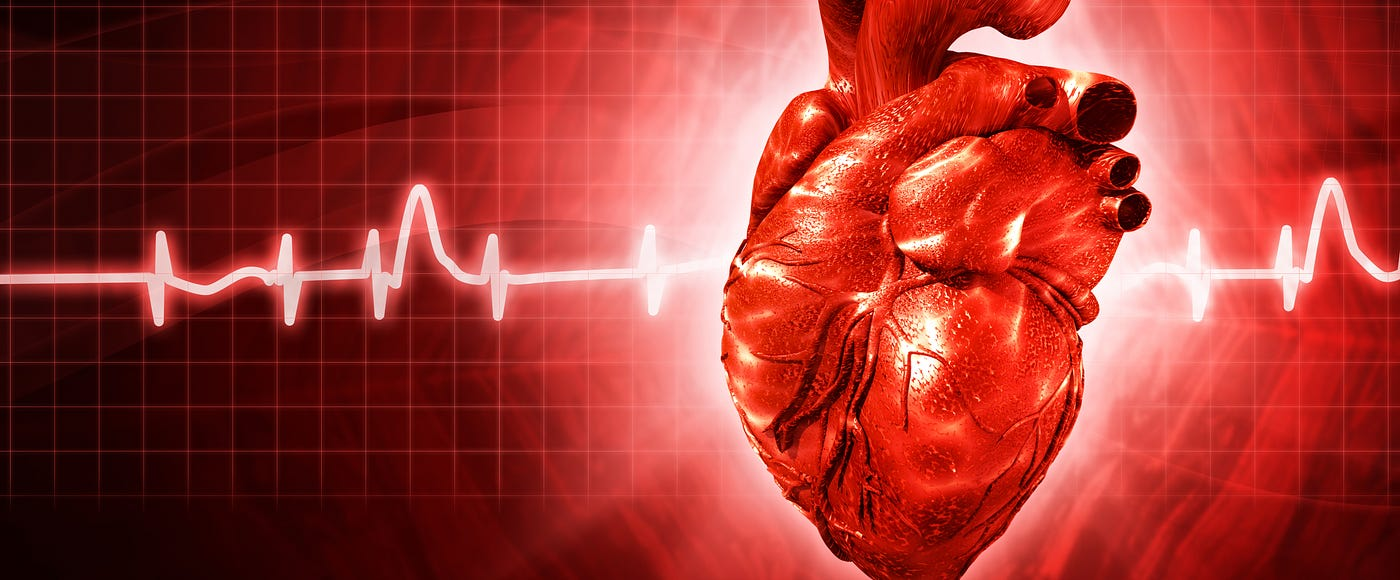

In [1]:
from IPython.display import Image, display

# Display the image
display(Image(filename='heart.jpg'))

### Introduction
Heart disease remains one of the leading causes of death worldwide, and early detection can significantly reduce the risk of fatal outcomes. In the healthcare industry, particularly in cardiology, predictive analytics is becoming an essential tool to enhance patient care. Healthcare providers need accurate models that can predict the likelihood of heart disease in patients based on their clinical data. Such predictions can lead to proactive measures, timely interventions, and personalized treatment plans, ultimately improving patient outcomes and reducing the strain on healthcare systems.

### Objective
The objective of this project is to develop a Machine Learning model that accurately predicts the presence of heart disease in patients. By analyzing patient health records—including demographic, clinical, and diagnostic test information—the model aims to:

- Predict Heart Disease: Identify patients with a high risk of heart disease with high accuracy.
- Understand Key Health Indicators: Highlight the most significant health factors contributing to heart disease.
- Improve Healthcare Decisions: Provide healthcare providers with actionable insights to prioritize high-risk patients for further examination or treatment.

### Data Description
Id: Unique identifier for each patient.

Age: Age of the patient.

Sex: Gender of the patient (0 = Female, 1 = Male).

cp: Chest pain type (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic).

trestbps: Resting blood pressure (in mm Hg on admission to the hospital).

chol: Serum cholesterol level in mg/dl.

fbs: Fasting blood sugar > 120 mg/dl (1 = True, 0 = False).

restecg: Resting electrocardiographic results (0 = Normal, 1 = Having ST-T wave abnormality, 2 = Left ventricular hypertrophy).

thalach: Maximum heart rate achieved.

exang: Exercise-induced angina (1 = Yes, 0 = No).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping).

ca: Number of major vessels (0-4) colored by fluoroscopy.

thal: Thalassemia status (0 = Normal, 1 = Fixed defect, 2 = Reversible defect, 3 = Missing).

target: The target variable indicating the presence of heart disease (1 = Yes, 0 = No).

### Importing Libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visualization layout and palette
sns.set()
custom_colors = ['#176d9c', '#c38820', '#158b6a', '#ba611b', '#c282b5']
sns.set_palette(custom_colors)

# Libraries to handle warning
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from catboost import CatBoostClassifier
from sklearn.svm import SVC

from sklearn.utils import resample

### Loading the datasets

In [3]:
# Reading the train CSV file
df = pd.read_csv("Train Dataset .csv")

In [4]:
# Reading the test CSV file
df_test = pd.read_csv("Test Dataset.csv")

In [5]:
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [6]:
df_test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


### Basic Exploration and Cleaning

- Some columns in the train dataset are Initial cap. They will be changed to lower for consistency

In [7]:
# Convert column names to lowercase directly
df.columns = [col.lower() for col in df.columns]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [9]:
df.shape

(7303, 15)

In [10]:
# List of columns to convert to object (string)
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Convert the columns to string (object)
df[categorical_columns] = df[categorical_columns].astype(str)

# Verify the changes
print(df.dtypes)

id            int64
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object


In [11]:
# Checking for dudplicates
df.duplicated().sum()

0

- No Duplicate

In [12]:
# Discriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7303.0,15021.535396,2886.026080,10001.0,12521.5,15054.0,17513.5,19998.0
age,7303.0,53.172669,14.185970,29.0,41.0,53.0,65.0,77.0
trestbps,7303.0,147.447487,31.099538,94.0,120.0,148.0,174.0,200.0
chol,7303.0,342.805970,127.291998,126.0,231.0,341.0,450.0,564.0
thalach,7303.0,136.506093,38.141966,71.0,104.0,137.0,170.0,202.0
oldpeak,7303.0,3.129851,1.791160,0.0,1.6,3.1,4.7,6.2
target,7303.0,0.813501,0.389535,0.0,1.0,1.0,1.0,1.0


- age: The average age of patients is about 53 years old, with a minimum of 29 and a maximum of 77 years.
- trestbps (Resting Blood Pressure): The mean resting blood pressure is 147.4 mm Hg, with a standard deviation of 31.1. The values range from 94 to 200 mm Hg.
- chol (Cholesterol): The cholesterol levels range from 126 to 564 mg/dL, with a mean of 342.8 mg/dL. The high max value could indicate possible outliers.
- thalach (Max Heart Rate Achieved): Patients have an average maximum heart rate of 136.5 bpm, with a range from 71 to 202 bpm.
- oldpeak: The ST depression values range from 0 to 6.2, with an average of 3.13.

In [13]:
# Getting the categorical features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [14]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

### Exploratory Data Analysis (EDA)

#### Univirate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Suppress the FutureWarning related to use_inf_as_na
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        
        # Plotting
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize)  # creating the 2 subplots

        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="#176d9c")        #showfliers=False,
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="#c38820") if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="#c38820")

        # Add mean and median lines
        ax_hist2.axvline(data[feature].mean(), color="#176d9c", linestyle="--")
        ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None, save_path=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    save_path: file path to save the plot (default None, doesn't save)
    """
    # Suppress the FutureWarning related to use_inf_as_na
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        
        # Plotting
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize)  # creating the 2 subplots

        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="#176d9c")  # Boxplot
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="#c38820") if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="#c38820")  # Histogram

        # Add mean and median lines
        ax_hist2.axvline(data[feature].mean(), color="#176d9c", linestyle="--")
        ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

        # Save the figure if save_path is provided
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

        # Show the plot
        plt.show()


**`DISTRIBUTION OF AGE`**

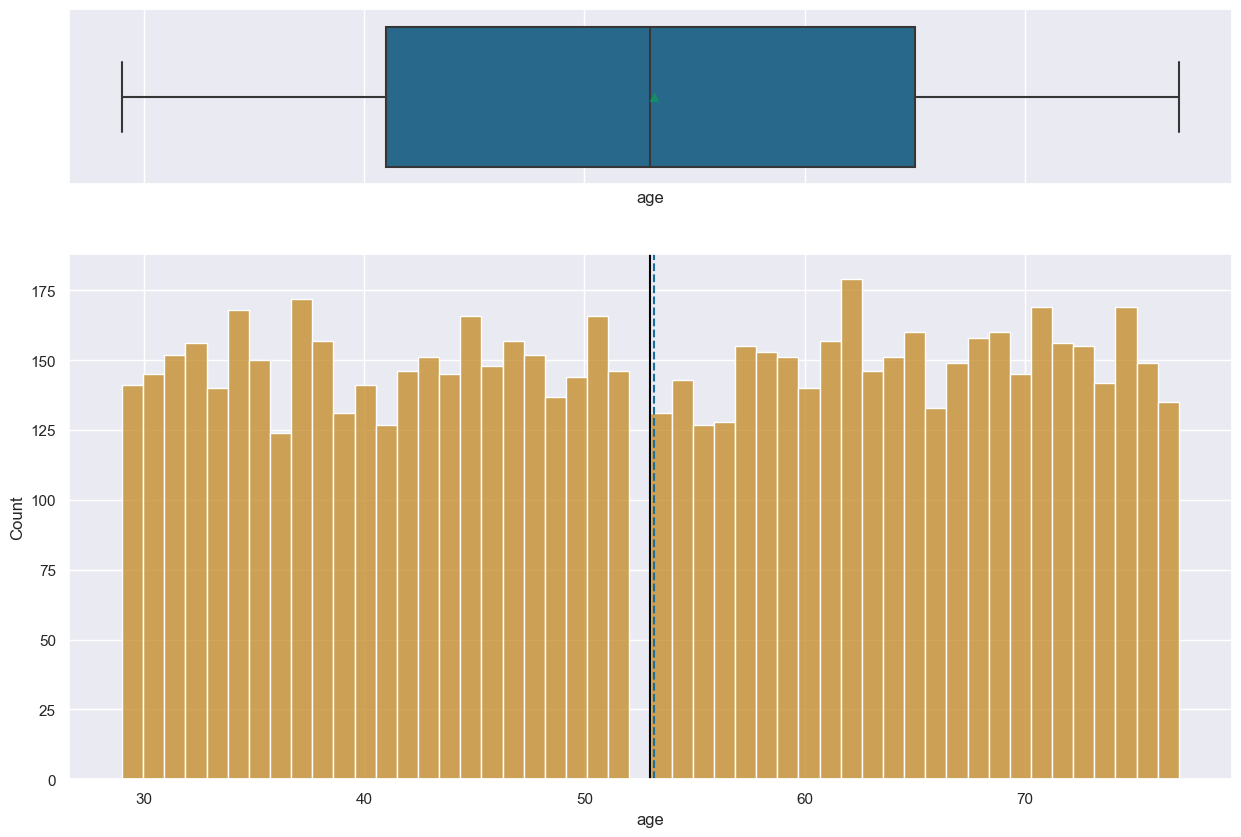

In [17]:
histogram_boxplot(df, "age", bins=50)

- The age distribution follows a near-normal curve, suggesting that most patients' ages are centered around a typical value.
- Both the mean and median age of patients are approximately 54 years, indicating that the data is symmetrically distributed without significant skew.

**`DISTRIBUTION OF RESTING BLOOD PRESSURE (trestbps)`**

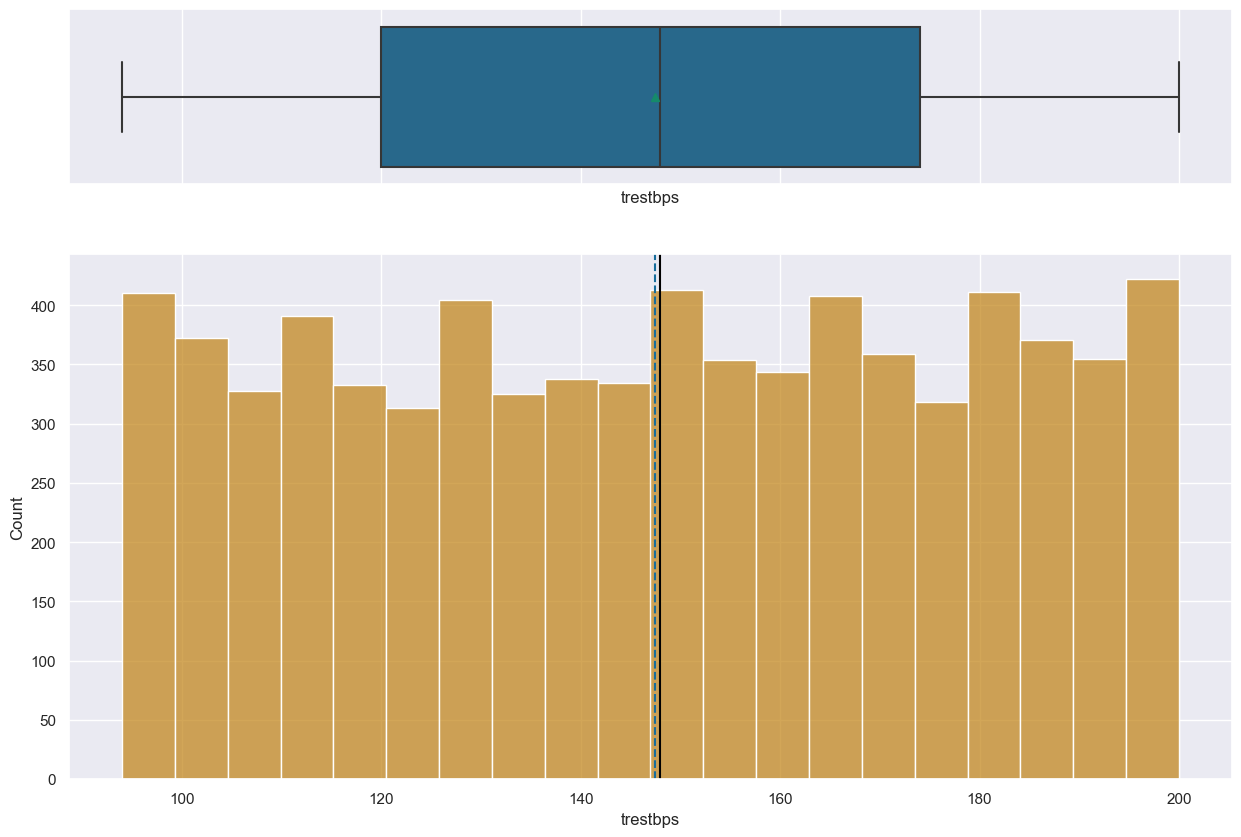

In [18]:
histogram_boxplot(df, "trestbps")

- Resting blood pressure also exhibits a normal distribution, indicating that most patients have blood pressure values concentrated around a central point with balanced variability on either side.

**`DISTRIBUTION OF SERUM CHOLESTEROL LEVEL (chol)`**

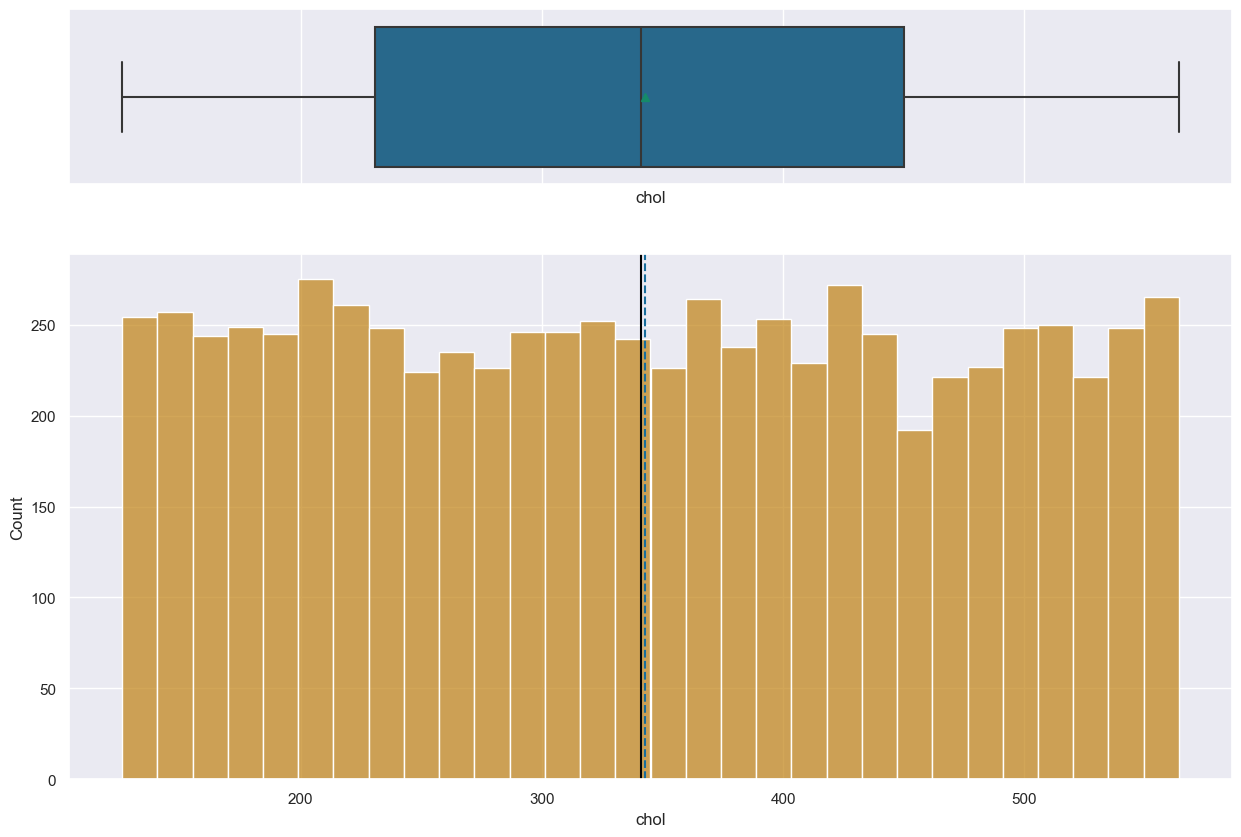

In [19]:
histogram_boxplot(df, "chol", bins= 30)

- The values for cholesterol (x-axis) range roughly between 150 and 550.
- The distribution of cholesterol levels is relatively even across the range. This indicates that in this dataset, cholesterol levels are somewhat evenly distributed across various ranges, without major spikes or dips.
- Despite some variations, the distribution still appears relatively uniform. There is no major skew or long tail in any particular direction, meaning most cholesterol levels fall in a central range without significant outliers.

**`DISTRIBUTION OF MAXIMUM HEART RATE (thalach)`**

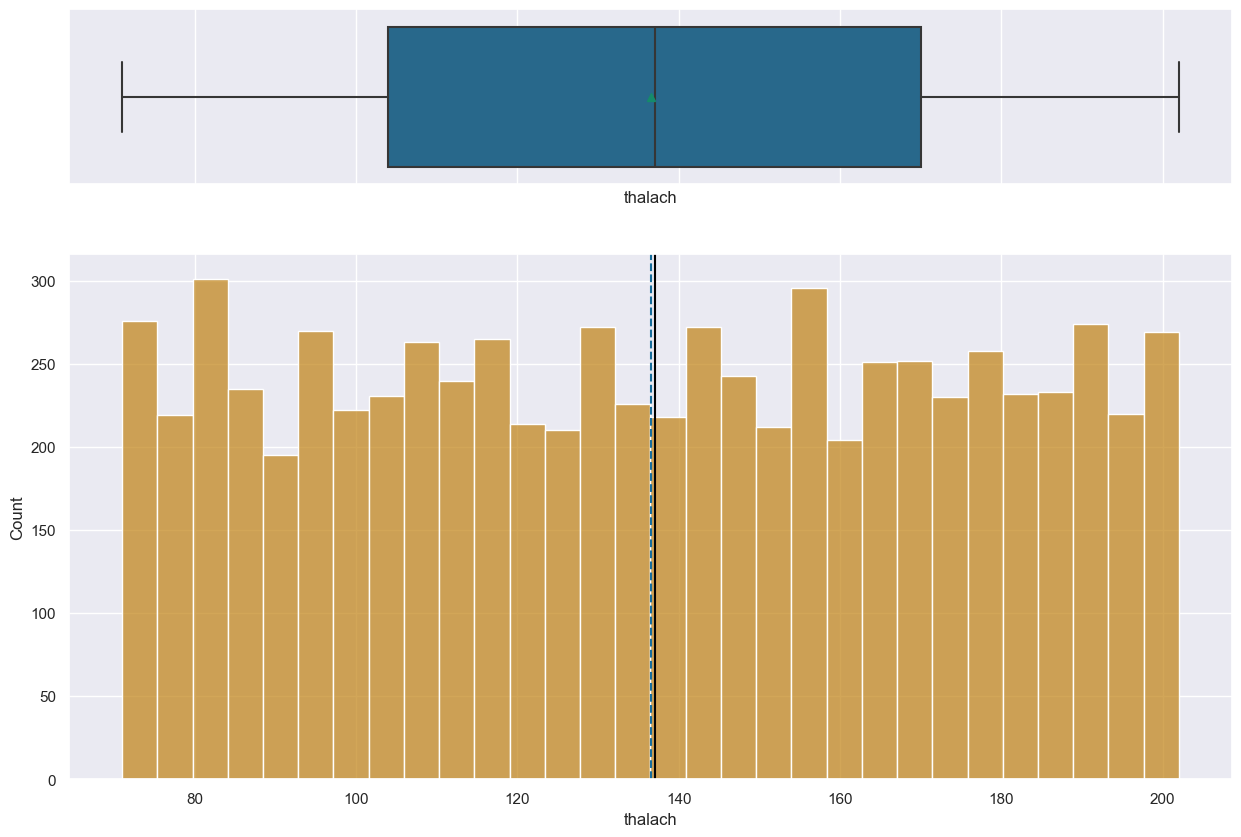

In [20]:
histogram_boxplot(df, "thalach", bins= 30)

- The boxplot shows that the data is distributed between approximately 70 and 200, which is the range of the heart rates recorded.
- There are no points plotted outside the whiskers, which suggests that there are no significant outliers in this dataset for the thalach variable.
- he distribution is relatively balanced, with some fluctuation in counts across different heart rate ranges.

**`DISTRIBUTION OF oldpeak`**

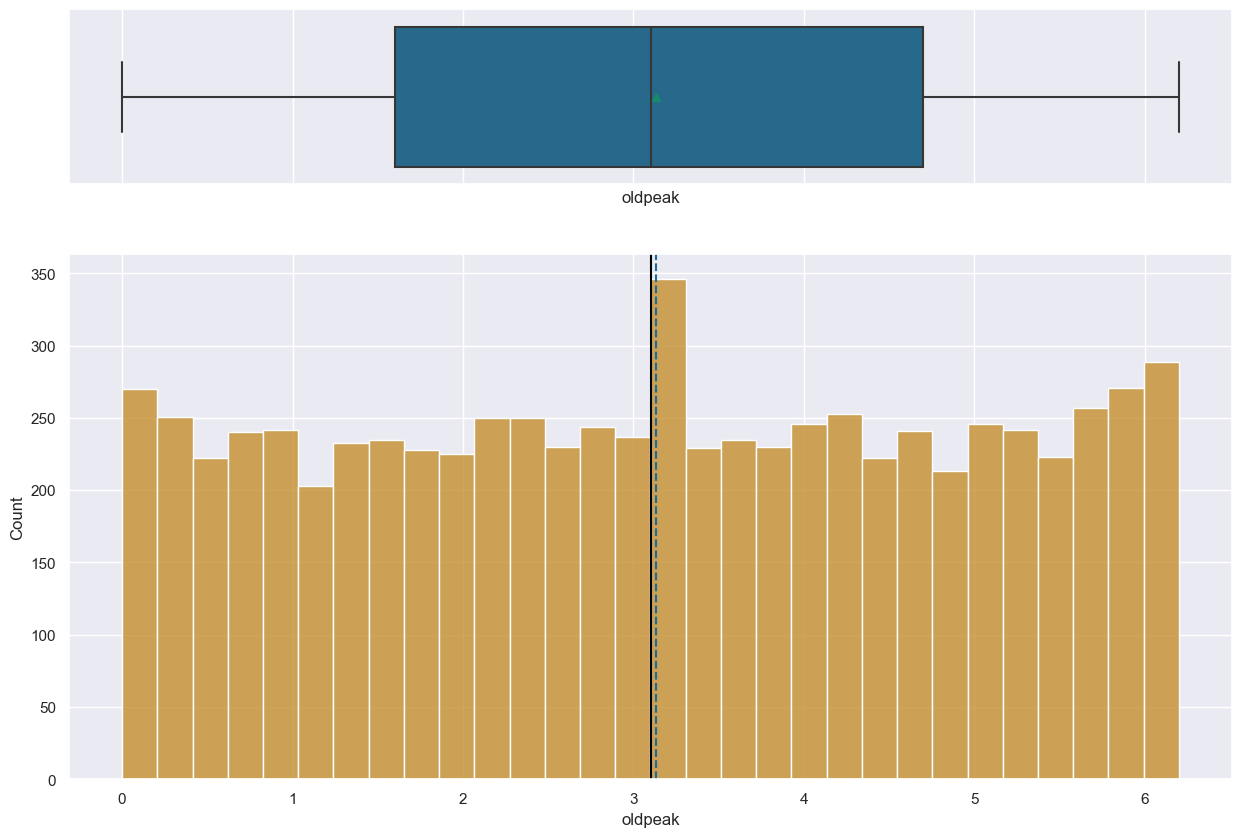

In [21]:
histogram_boxplot(df, "oldpeak", bins= 30)

- The boxplot shows that the data is distributed between approximately 70 and 200, which is the range of the heart rates recorded.
- There are no points plotted outside the whiskers, which suggests that there are no significant outliers in this dataset for the thalach variable.
- he distribution is relatively balanced, with some fluctuation in counts across different heart rate ranges.

In [22]:
# Printing number of count of each unique value in each column in a descending order
for column in categorical_columns:
    print(df[column].value_counts(ascending = False))
    print("-" * 50)

sex
0    3654
1    3649
Name: count, dtype: int64
--------------------------------------------------
cp
1    1858
3    1829
2    1814
0    1802
Name: count, dtype: int64
--------------------------------------------------
fbs
0    3702
1    3601
Name: count, dtype: int64
--------------------------------------------------
restecg
2    2478
1    2442
0    2383
Name: count, dtype: int64
--------------------------------------------------
exang
1    3675
0    3628
Name: count, dtype: int64
--------------------------------------------------
slope
0    2470
1    2425
2    2408
Name: count, dtype: int64
--------------------------------------------------
ca
2    1505
4    1488
3    1448
1    1439
0    1423
Name: count, dtype: int64
--------------------------------------------------
thal
1    1879
3    1822
2    1813
0    1789
Name: count, dtype: int64
--------------------------------------------------


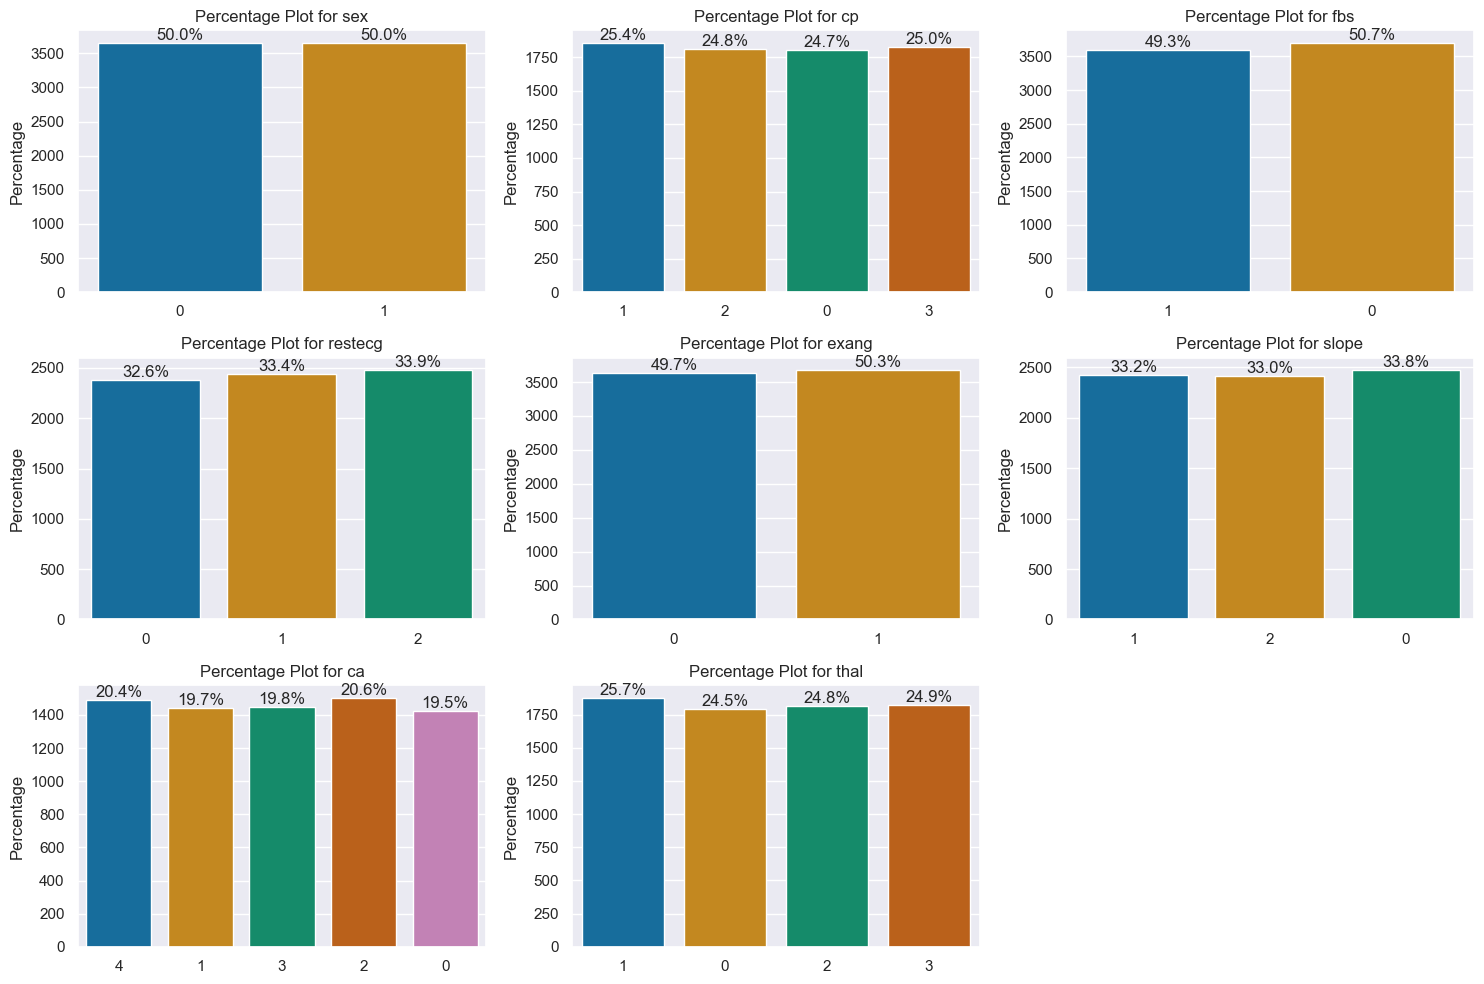

In [23]:
# Number of columns for the subplot grid
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Create a percentage plot for each column
for i, col in enumerate(categorical_columns):
    total = len(df[col])  # Get the total number of rows for calculating percentages
    ax = sns.countplot(data=df, x=col, palette='colorblind', ax=axes[i])
    axes[i].set_title(f"Percentage Plot for {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Percentage')

    # Annotate percentages on bars
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

- **Balanced Variables:** All the variables are relatively well-distributed across their categories, which is great for the model as it reduces the risk of bias towards specific values.
- **Impact on Learning:** The model will be able to learn meaningful patterns from all categories, increasing the chances of robust, generalizable predictions.

#### Bivirate Analysis

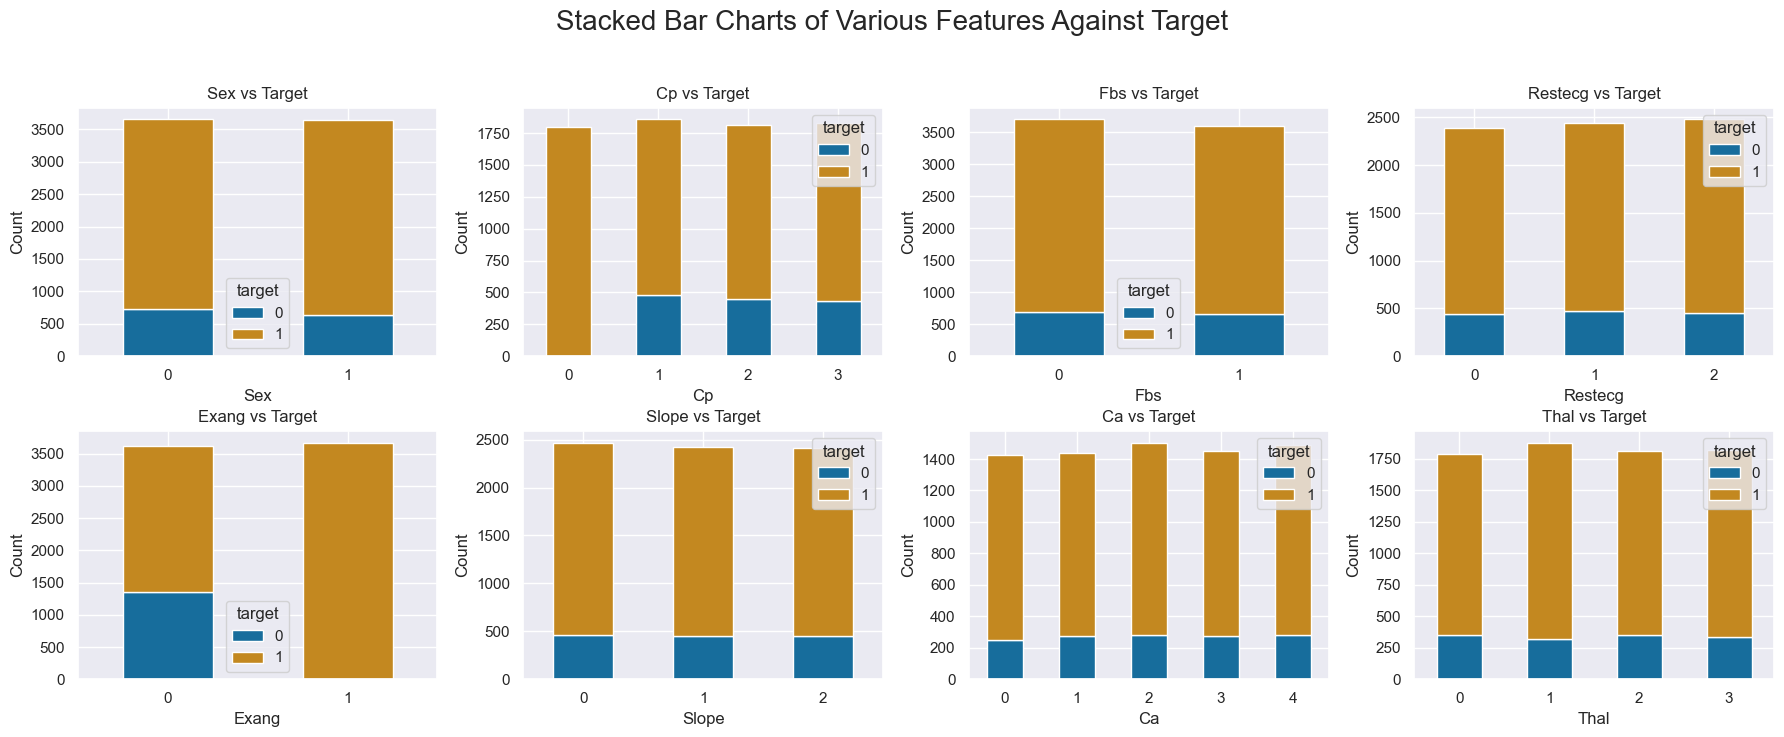

In [24]:
# Set up the figure and axes for the subplots with 3 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 7.5))
fig.suptitle('Stacked Bar Charts of Various Features Against Target', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and create subplots
for idx, column in enumerate(categorical_columns):
    # Group the data by the target 'target' and the column
    grouped_data = df.groupby([column, 'target']).size().unstack(fill_value=0)
    
    # Plot the stacked bar chart using the custom color palette
    grouped_data.plot(kind='bar', stacked=True, ax=axes[idx], color=custom_colors[:grouped_data.shape[1]])
    
    # Set titles and labels
    axes[idx].set_title(f'{column.capitalize()} vs Target')
    axes[idx].set_xlabel(column.capitalize())
    axes[idx].set_ylabel('Count')

    # Set the x-axis labels rotation to 0
    axes[idx].set_xticklabels(grouped_data.index, rotation=0)

# Remove any unused subplot axes
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and increase space between rows
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.3)  # Increase the value to add more space

plt.show()


In [25]:
df.target.value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

- **Class Imbalance:** In all the features, it is apparent that there are generally more instances of class 1 (heart disease) than class 0 (non heart disease). This might indicate a class imbalance in the dataset, where the heart disease significantly outnumber the non heart disease.
- Chest Pain Type 0 is more strongly correlated with heart disease. while others are more evenly distributed.
- Also, Those with exercise-induced angina (exang=1) are much more likely to not have heart disease, while those without angina (exang=0) are more likely to have heart disease.

### Data Preprocessing

In [26]:
df.drop(columns=['id'], inplace=True)

In [27]:
df2 = df.copy()

In [28]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Apply label encoding to the specified columns individually
df2['cp'] = le.fit_transform(df2['cp'])
df2['slope'] = le.fit_transform(df2['slope'])
df2['ca'] = le.fit_transform(df2['ca'])


In [29]:
# Apply One-Hot Encoding to categorical columns
categorical_columns = ['sex', 'fbs', 'restecg', 'thal', 'exang']
df2 = pd.get_dummies(df2, columns=categorical_columns)


In [30]:
df2.head()

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,target,sex_0,...,fbs_1,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1
0,33,1,158,205,154,1.5,1,4,1,True,...,True,True,False,False,False,True,False,False,True,False
1,53,2,198,154,104,0.8,2,1,0,False,...,False,False,True,False,True,False,False,False,True,False
2,37,2,101,202,155,2.1,1,3,1,False,...,True,True,False,False,False,True,False,False,True,False
3,75,0,113,306,88,4.9,0,2,1,True,...,True,False,False,True,False,False,True,False,False,True
4,35,2,139,419,166,0.9,2,4,1,False,...,True,False,True,False,True,False,False,False,False,True


In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df2[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [32]:
df2.head()

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,target,sex_0,...,fbs_1,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1
0,-1.422113,1,0.339337,-1.082671,0.458684,-0.910004,1,4,1,True,...,True,True,False,False,False,True,False,False,True,False
1,-0.012173,2,1.625618,-1.483352,-0.852298,-1.300839,2,1,0,False,...,False,False,True,False,True,False,False,False,True,False
2,-1.140125,2,-1.493613,-1.106241,0.484904,-0.575002,1,3,1,False,...,True,True,False,False,False,True,False,False,True,False
3,1.538762,0,-1.107729,-0.289166,-1.271812,0.988337,0,2,1,True,...,True,False,False,True,False,False,True,False,False,True
4,-1.281119,2,-0.271646,0.598618,0.773320,-1.245005,2,4,1,False,...,True,False,True,False,True,False,False,False,False,True


In [33]:
# Data Splitting
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['target'])
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Balancing the train data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


### Modelling

In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, train_predictors, train_target, test_predictors, test_target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    train_predictors: independent variables for the training set
    train_target: dependent variable for the training set
    test_predictors: independent variables for the test set
    test_target: dependent variable for the test set
    """
    
    # Predictions
    y_train_pred = model.predict(train_predictors)
    y_test_pred = model.predict(test_predictors)

    # Calculating metrics for training set
    accuracy_train = accuracy_score(train_target, y_train_pred)
    recall_train = recall_score(train_target, y_train_pred)
    precision_train = precision_score(train_target, y_train_pred)
    f1_score_train = f1_score(train_target, y_train_pred)

    # Calculating metrics for test set
    accuracy_test = accuracy_score(test_target, y_test_pred)
    recall_test = recall_score(test_target, y_test_pred)
    precision_test = precision_score(test_target, y_test_pred)
    f1_score_test = f1_score(test_target, y_test_pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Train Accuracy": [accuracy_train],
            "Train Recall": [recall_train],
            "Train Precision": [precision_train],
            "Train F1": [f1_score_train],

            "Test Accuracy": [accuracy_test],
            "Test Recall": [recall_test],
            "Test Precision": [precision_test],
            "Test F1": [f1_score_test],
        }
    )

    return df_perf


In [36]:
# Confusion matrix plotting
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion matrix with percentages
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100  # Percentage per class

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=cm_percentage, fmt=".2f", cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix (with Percentages)")


### Logistic Regression

In [37]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting the Logistic Regression model
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics for Logistic Regression
logreg_model_perf = model_performance_classification_sklearn(logreg, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the existing DataFrame to "Logistic Regression"
logreg_model_perf.index = ["Logistic Regression"]

# Display the DataFrame
logreg_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression,0.854114,0.831013,0.871267,0.850664,0.819986,0.844296,0.930275,0.885203


### SVM

In [38]:
# Importing SVM (Support Vector Classifier)
from sklearn.svm import SVC

# Fitting the SVM model
svm = SVC(random_state = 42)
svm.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics for SVM
svm_model_perf = model_performance_classification_sklearn(svm, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the existing DataFrame to "SVM"
svm_model_perf.index = ["SVM"]

# Display the DataFrame
svm_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
SVM,0.891878,0.785865,0.997323,0.879056,0.81588,0.78851,0.984407,0.875636


### K Neighbors

In [39]:
# Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Fitting the K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
knn_model_perf = model_performance_classification_sklearn(knn, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the existing DataFrame to "Decision Tree"
knn_model_perf.index = ["K Neighbors"]

# Display the DataFrame
knn_model_perf

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
K Neighbors,0.912975,0.827637,0.997965,0.904855,0.768652,0.776853,0.930209,0.846642


### Decision Tree

In [40]:
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Fitting the Decision Tree model
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
dtree_model_perf = model_performance_classification_sklearn(dtree, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Decision Tree"
dtree_model_perf.index = ["Decision Tree"]

# Display the DataFrame
dtree_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Decision Tree,1.0,1.0,1.0,1.0,0.826831,0.873439,0.912174,0.892386


### Random Forest

In [41]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting the Random Forest model
rf = RandomForestClassifier(random_state= 42)
rf.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
random_forest_model_perf = model_performance_classification_sklearn(rf, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Random Forest"
random_forest_model_perf.index = ["Random Forest"]

# Display the DataFrame
random_forest_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Random Forest,1.0,1.0,1.0,1.0,0.820671,0.82348,0.951877,0.883036


### Ada Boost

In [42]:
# Importing AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Fitting the AdaBoost model
ada_boost = AdaBoostClassifier(random_state= 42)
ada_boost.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
ada_boost_model_perf = model_performance_classification_sklearn(ada_boost, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Ada Boost"
ada_boost_model_perf.index = ["Ada Boost"]

# Display the DataFrame
ada_boost_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Ada Boost,0.885865,0.783544,0.985146,0.872855,0.815195,0.789342,0.982383,0.875346


### Gradient Boosting

In [43]:
# Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Fitting the Gradient Boosting model
gradient_boost = GradientBoostingClassifier(random_state= 42)
gradient_boost.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
gradient_boost_model_perf = model_performance_classification_sklearn(gradient_boost, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Gradient Boosting"
gradient_boost_model_perf.index = ["Gradient Boosting"]

# Display the DataFrame
gradient_boost_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Gradient Boosting,0.892194,0.791139,0.991539,0.880075,0.814511,0.789342,0.981366,0.874942


### Cat Boost

In [44]:
# Importing CatBoostClassifier
from catboost import CatBoostClassifier

# Fitting the CatBoost model
cat_boost = CatBoostClassifier(learning_rate=0.1, depth=6, iterations=500, random_state= 42, verbose=0)
cat_boost.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
cat_boost_model_perf = model_performance_classification_sklearn(cat_boost, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "Cat Boost"
cat_boost_model_perf.index = ["Cat Boost"]

# Display the DataFrame
cat_boost_model_perf


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Cat Boost,0.993143,0.986287,1.0,0.993096,0.815195,0.853455,0.915996,0.883621


### XGBoost

In [45]:
# Importing XGBClassifier
from xgboost import XGBClassifier

# Fitting the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state= 42)
xgb.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
xgb_model_perf = model_performance_classification_sklearn(xgb, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "XGBoost"
xgb_model_perf.index = ["XGBoost"]

# Display the DataFrame
xgb_model_perf


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
XGBoost,0.99346,0.987342,0.999573,0.99342,0.820671,0.862614,0.914387,0.887746


### LightGMB 

In [46]:
# Importing LGBMClassifier
from lightgbm import LGBMClassifier

# Fitting the LightGBM model
lgbm = LGBMClassifier(random_state= 42)
lgbm.fit(X_train_resampled, y_train_resampled)

# Calculating performance metrics
lgbm_model_perf = model_performance_classification_sklearn(lgbm, X_train_resampled, y_train_resampled, X_test, y_test)

# Set the index of the DataFrame to "LightGBM"
lgbm_model_perf.index = ["LightGBM"]

# Display the DataFrame
lgbm_model_perf


[LightGBM] [Info] Number of positive: 4740, number of negative: 4740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 9480, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
LightGBM,0.97173,0.944515,0.998884,0.970939,0.805613,0.826811,0.928906,0.87489


### All Models

In [47]:
# Ensure each DataFrame has a unique index
logreg_model_perf.index = ["Logistic Regression"]
svm_model_perf.index = ["SVM"]
knn_model_perf.index = ["K Neighbors"]
dtree_model_perf.index = ["Decision Tree"]
random_forest_model_perf.index = ["Random Forest"]
ada_boost_model_perf.index = ["Ada Boost"]
gradient_boost_model_perf.index = ["Gradient Boost"]
cat_boost_model_perf.index = ["Cat Boost"]
xgb_model_perf.index = ["XGBoost"]
lgbm_model_perf.index = ["LightGBM"]

# Combine all DataFrames into one
all_model_performance = pd.concat([
    logreg_model_perf,
    svm_model_perf,
    knn_model_perf,
    dtree_model_perf,
    random_forest_model_perf,
    ada_boost_model_perf,
    gradient_boost_model_perf,
    cat_boost_model_perf,
    xgb_model_perf,
    lgbm_model_perf
])

all_model_performance

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression,0.854114,0.831013,0.871267,0.850664,0.819986,0.844296,0.930275,0.885203
SVM,0.891878,0.785865,0.997323,0.879056,0.815880,0.788510,0.984407,0.875636
K Neighbors,0.912975,0.827637,0.997965,0.904855,0.768652,0.776853,0.930209,0.846642
Decision Tree,1.000000,1.000000,1.000000,1.000000,0.826831,0.873439,0.912174,0.892386
Random Forest,1.000000,1.000000,1.000000,1.000000,0.820671,0.823480,0.951877,0.883036
Ada Boost,0.885865,0.783544,0.985146,0.872855,0.815195,0.789342,0.982383,0.875346
Gradient Boost,0.892194,0.791139,0.991539,0.880075,0.814511,0.789342,0.981366,0.874942
Cat Boost,0.993143,0.986287,1.000000,0.993096,0.815195,0.853455,0.915996,0.883621
XGBoost,0.993460,0.987342,0.999573,0.993420,0.820671,0.862614,0.914387,0.887746
LightGBM,0.971730,0.944515,0.998884,0.970939,0.805613,0.826811,0.928906,0.874890


In [48]:
# Ensure each DataFrame has a unique index
logreg_model_perf.index = ["Logistic Regression"]
svm_model_perf.index = ["SVM"]
knn_model_perf.index = ["K Neighbors"]
dtree_model_perf.index = ["Decision Tree"]
random_forest_model_perf.index = ["Random Forest"]
ada_boost_model_perf.index = ["Ada Boost"]
gradient_boost_model_perf.index = ["Gradient Boost"]
cat_boost_model_perf.index = ["Cat Boost"]
xgb_model_perf.index = ["XGBoost"]
lgbm_model_perf.index = ["LightGBM"]

# Combine all DataFrames into one
all_model_performance = pd.concat([
    logreg_model_perf,
    svm_model_perf,
    knn_model_perf,
    dtree_model_perf,
    random_forest_model_perf,
    ada_boost_model_perf,
    gradient_boost_model_perf,
    cat_boost_model_perf,
    xgb_model_perf,
    lgbm_model_perf
])

all_model_performance

,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
Logistic Regression,0.854114,0.831013,0.871267,0.850664,0.819986,0.844296,0.930275,0.885203
SVM,0.891878,0.785865,0.997323,0.879056,0.815880,0.788510,0.984407,0.875636
K Neighbors,0.912975,0.827637,0.997965,0.904855,0.768652,0.776853,0.930209,0.846642
Decision Tree,1.000000,1.000000,1.000000,1.000000,0.826831,0.873439,0.912174,0.892386
Random Forest,1.000000,1.000000,1.000000,1.000000,0.820671,0.823480,0.951877,0.883036
Ada Boost,0.885865,0.783544,0.985146,0.872855,0.815195,0.789342,0.982383,0.875346
Gradient Boost,0.892194,0.791139,0.991539,0.880075,0.814511,0.789342,0.981366,0.874942
Cat Boost,0.993143,0.986287,1.000000,0.993096,0.815195,0.853455,0.915996,0.883621
XGBoost,0.993460,0.987342,0.999573,0.993420,0.820671,0.862614,0.914387,0.887746
LightGBM,0.971730,0.944515,0.998884,0.970939,0.805613,0.826811,0.928906,0.874890


## Testing

### Testing Preprocessing

In [49]:
df_test = df_test.copy()

In [50]:
df_test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [51]:
df_test.drop(columns=['id'], inplace=True)

In [52]:
# Create a label encoder instance
le = LabelEncoder()

# Apply label encoding to the specified columns individually
df_test['cp'] = le.fit_transform(df_test['cp'])
df_test['slope'] = le.fit_transform(df_test['slope'])
df_test['ca'] = le.fit_transform(df_test['ca'])


In [53]:
# Apply One-Hot Encoding to categorical columns
categorical_columns = ['sex', 'fbs', 'restecg', 'thal', 'exang']
df_test = pd.get_dummies(df_test, columns=categorical_columns)


In [54]:
# Feature Scaling
df_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [55]:
X_new_test = df_test.copy()

In [56]:
df2.head()

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,target,sex_0,...,fbs_1,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1
0,-1.422113,1,0.339337,-1.082671,0.458684,-0.910004,1,4,1,True,...,True,True,False,False,False,True,False,False,True,False
1,-0.012173,2,1.625618,-1.483352,-0.852298,-1.300839,2,1,0,False,...,False,False,True,False,True,False,False,False,True,False
2,-1.140125,2,-1.493613,-1.106241,0.484904,-0.575002,1,3,1,False,...,True,True,False,False,False,True,False,False,True,False
3,1.538762,0,-1.107729,-0.289166,-1.271812,0.988337,0,2,1,True,...,True,False,False,True,False,False,True,False,False,True
4,-1.281119,2,-0.271646,0.598618,0.773320,-1.245005,2,4,1,False,...,True,False,True,False,True,False,False,False,False,True


In [57]:
X_new_test.head()

,age,cp,trestbps,chol,thalach,oldpeak,slope,ca,sex_0,sex_1,...,fbs_1,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1
0,1.180311,0,0.542359,1.186502,0.885296,-0.631450,1,0,False,True,...,False,False,False,True,False,True,False,False,False,True
1,0.553060,0,-0.502201,-0.833280,-1.613872,0.971054,2,2,False,True,...,False,False,False,True,False,False,True,False,False,True
2,-0.004496,0,-1.677331,1.681623,-1.639905,-1.349814,1,1,False,True,...,True,False,True,False,True,False,False,False,False,True
3,-1.119610,1,1.031997,-0.448186,1.458022,1.413124,1,0,True,False,...,False,False,True,False,True,False,False,False,False,True
4,-1.258999,3,-1.383549,-0.495340,-0.364288,-1.018261,1,4,True,False,...,False,True,False,False,False,False,False,True,True,False


In [58]:
y_new_pred = dtree.predict(X_new_test)

In [59]:
y_new_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Submission

In [60]:
test_xgb = xgb.predict(X_new_test)
test_xgb

array([1, 1, 1, ..., 1, 1, 0])

In [61]:
subm_df = pd.read_csv("Sample Submission.csv")

In [62]:
subm_df.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [63]:
subm_df["target"] = test_xgb

In [64]:
subm_df.head()

,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1


In [65]:
subm_df["target"].value_counts()

target
1    1954
0     743
Name: count, dtype: int64

In [66]:
subm_df.to_csv("submission105.csv", index = False)